<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/Tutorials/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression

**Single Linear Regression :**
*It is supervised learning algorithm, here we have one input column and one output column, just like `y = mx + c`*
In this case we have one feature and one target/output, we have to derive an equation based on given examples of feature(only one) and relate it with the target.
The result of single linear regresion is a straight line equation.
```
 y = wx + b, b being the intercept/bias.
```
First thing is we can do with any data is to plot it, we can observe from any data is linearity/non-linearity. In any case(whether the data is linear/non-linear), we can always draw a straight line which is closest to most of the data points, as we are performing single linear regression.


To get started with single linear regression problem, we can get some random points and then try to predict result for some other points, which we didn't consider during analysis/training.



In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
print('Done.')

Done.


In [ ]:
# generate dataset for our single linear regression
feature = np.linspace(-430, 432, 100)
target = np.linspace(-53, 67, 100)

feature[:10], target[:10]

(array([-430.        , -421.29292929, -412.58585859, -403.87878788,
        -395.17171717, -386.46464646, -377.75757576, -369.05050505,
        -360.34343434, -351.63636364]),
 array([-53.        , -51.78787879, -50.57575758, -49.36363636,
        -48.15151515, -46.93939394, -45.72727273, -44.51515152,
        -43.3030303 , -42.09090909]))

In [ ]:
# generate a pandas dataframe

data = pd.DataFrame(
    data = {
        'Feature' : [np.round(x, 2) for x in feature],
        'Target': [np.round(x, 2) for x in target]
      }
  )

data.head()

,Feature,Target
0,-430.00,-53.00
1,-421.29,-51.79
2,-412.59,-50.58
3,-403.88,-49.36
4,-395.17,-48.15


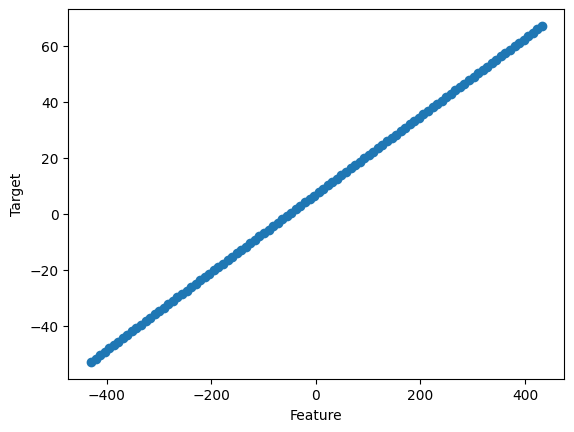

In [ ]:
# plot the points
plt.scatter(data['Feature'], data['Target'])
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

*In this case we can see the generated data fits in a perfect straight line but it is usually not the case in real datasets*


In [ ]:
x = data['Feature'].values.reshape(-1, 1) # doing this reshape because the built-in regression model expects 2d array
y = data['Target'].values.reshape(-1, 1)

# Divide the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.2
)

train_x.shape, train_y.shape

((80, 1), (80, 1))

In [ ]:
# Using built-in Linear Regression method from sklearn
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# training the model
lr_model.fit(train_x, train_y)
print('Training Completed.')

Training Completed.


Prediction for each of the `test_x` array values, and then comparing them with the `test_y`(the actual output), we will use mean absolute error for this comparison.

In [ ]:
lr_result = lr_model.predict(test_x)
result = pd.DataFrame(
    data = {
        'Actual Value' : [x[0] for x in test_y],
        'Predicted_value' : [x[0] for x in lr_result],
        'Error' : [abs(np.round(x[0] - y[0], 5)) for x, y in zip(test_y, lr_result)]
        }
    )

result.head(10)

,Actual Value,Predicted_value,Error
0,13.67,13.666793,0.00321
1,-45.73,-45.727808,0.00219
2,-23.91,-23.909184,0.00082
3,-33.61,-33.606660,0.00334
4,-53.00,-53.000219,0.00022
5,42.76,42.757828,0.00217
6,65.79,65.787592,0.00241
7,18.52,18.515531,0.00447
8,3.97,3.969318,0.00068
9,-37.24,-37.242865,0.00287


we can see we are getting some error, which is negligible, but we also know that this data was already in a perfect straight line shape, so this doesn't help much. Working on a real dataset would give us some insights about the errors with this approach.

In [ ]:
cars = pd.read_csv('https://raw.githubusercontent.com/krahul2024/machine-learning/main/datasets/Used%20Car%20Dataset.csv')
cars.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [ ]:
cars.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

There are no missing values in this dataset, so we can just use this dataset without getting into the data analysis part(as of now). To apply the single linear regression method on this dataset we can continue with kms_driven as a feature and price as the target.

In [ ]:
x = cars['kms_driven'].values.reshape(-1, 1)
y = cars['price(in lakhs)'].values.reshape(-1, 1)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x.shape

(1242, 1)

In [ ]:
lr_model = LinearRegression()

lr_model.fit(train_x, train_y)
print('Done.')

Done.


In [ ]:
preds = lr_model.predict(test_x)

results = pd.DataFrame(
    data = {
        'Actual' : [x[0] for x in test_y],
        'Prediction' : [np.round(x[0], 3) for x in preds],
        'Error' : [abs(np.round(x[0] - y[0], 3)) for x,y in zip(test_y, preds)]
    }
)

results.head()

,Actual,Prediction,Error
0,2.90,91.854,88.954
1,6.61,84.163,77.553
2,58.75,110.815,52.065
3,7.10,86.767,79.667
4,10.75,91.251,80.501


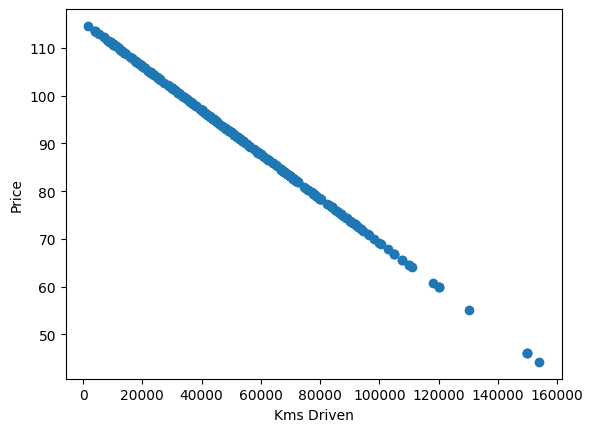

In [ ]:
plt.scatter([x[0] for x in test_x], results['Prediction'])
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()

We can see that relation between kms_driven and price is inverse, also that our predictions are very much off from actual prices, so these are the cases(almost all), where we can't just rely on single linear regression and we are required to use multiple features as we can't just base a car's price on the basis of how many kms_driven, we have to use mileage, make, years_old and various other features etc and to use all these features we use multiple linear regression( uses more than one features).
The equation is  :  $$ y = w_0 + w_1x_1 + \ldots + w_nx_n $$

In cases of linear regression, we can change the x-coefficient(s), intercept and see the losses and base our prediction line accordingly.

In case of this, single linear regression the implementation is given below. There are many solutions for this problem, one of them is using *closed form solution*.
**Closed form solution** : when a problem can be solved using straightforward solution or when an equation which can be solved in terms of functions and mathematical operations. Opposite of this is numerical method solution, where a problem is solved iteratively, using approximation. examples of numerical methods are *Newton-Raphson, Gradient Descent*. let's say for this equation $$ sin(x) + e^x = 0$$
we might not solve it using a direct method, so we go for some approximate solution, In case of closed form solutions, we don't use differentiation and integraion.

Linear/Quadratic/Exponential equations are some of the closed form solvable. We can say when our algorithm improves over multiple iterations that it is not a closed form solution, just in case of gradient descent.

*why do we even need to discuss the concept of non-closed form solutions, when we have a straight-forward formula to solve our problem?*

When we increase the number of features of dimensions, we see the problem with this closed-form solution, as it can't handle a large number of dimensions.

For a single dimension we can use the above formula for below variables:  

$$ y = w \times x  + b $$

Let's say we have some points, our goal is to minimize the distance between points and the optimal line. Let's take the distance of points from the line(optimal), and square them(why square?, we can't differentiate if we take the absolute of distances as modulus function is not differentiable on origin and another reason is we can penalize outliers when using squares), so we sum all the squares of differences.

$$ E = ∑_{i=1}^{n} d_{i}^2 $$

here d is the distance of any point from the line.
